In [1]:
## Import warnings. Supress warnings (for  matplotlib)
import warnings
warnings.filterwarnings("ignore")

In [2]:
##import analysis modules
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.getcwd()

'C:\\Users\\Yanhong Simokat\\Desktop\\DePaul\\DSC478'

In [4]:
os.chdir('C:\\Users\\Yanhong Simokat\\Desktop\\DePaul\\DSC478\\homework')

**1. K-Nearest-Neighbor (KNN) classification on Newsgroups**

**a. Create your own KNN classifier function. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K, and should return the predicted class for the instance and the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine Similarity.**

In [5]:
##load dataset
data = pd.read_csv("trainMatrixModified.txt", delimiter = '\t', header = None)
predict = pd.read_csv("testMatrixModified.txt", delimiter = '\t', header = None)
data_label = pd.read_csv("trainClasses.txt", delimiter = '\t', header= None, index_col = 0)
test_label = pd.read_csv("testClasses.txt", delimiter = '\t', header = None, index_col = 0)

In [6]:
data_label.reset_index(drop=True, inplace=True)
test_label.reset_index(drop=True, inplace=True)

In [7]:
#data_label.head()

In [8]:
#convert the dataset to a matrix
data_matrix = data.T.as_matrix()
test_matrix = predict.T.as_matrix()

In [9]:
data_matrix

array([[2., 2., 2., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
#x = test_matrix[0]

In [11]:
## Define a function for KNN search
def knn_search(x, D, label, K, measure): 
    """ find K nearest neighbours of data point x among D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        sims = np.dot(D,x)/(D_norm * x_norm)
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the predicted class for the instance and the top K neighbors
    return label.loc[idx[:K]][1].value_counts().idxmax(),idx[:K]

In [12]:
# Finding the k=5 nearest neighbors using inverse of Cosine similarity as a distance metric
class_label, neigh_idx = knn_search(test_matrix[0], data_matrix, data_label, 5, 1)

In [13]:
class_label

1

In [14]:
neigh_idx

array([685, 628, 667, 152, 427], dtype=int64)

In [15]:
test_label.head(2)

,1
0,1
1,0


**b.Create a function to compute the classification accuracy over the test data set (ratio of correct
predictions to the number of test instances). This function will call the classifier function in part a on all
the test instances and in each case compares the actual test class label to the predicted class label.**

In [16]:
## define a function to compute the classification accuracy over the test data set
def accuracy(test_matrix, data_matrix, data_label, test_label, K, measure): 
    correct = 0
    test_class_label = [knn_search(test_matrix[i], data_matrix, data_label, K, measure) for i in range(len(test_matrix))]
    for i in range(len(test_matrix)):
        if test_class_label[i][0] == test_label.loc[i][1]:
            correct += 1
    #accuracy = ratio of correct predictions to the number of test instances
    accuracyRate = float(correct) / float(len(test_matrix)) 
    return accuracyRate

In [17]:
d = accuracy(test_matrix,data_matrix, data_label,test_label, 15,1)
d

0.985

**c.Run your accuracy function on a range of values for K in order to compare accuracy values for different
numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. [For
example, you can try evaluating your classifiers on a range of values of K from 1 through 20 and present
the results as a table or a graph].**

In [18]:
##compare acuracy values on a range of values of K from 1 through 20
## Euclidean distance
euci = [accuracy(test_matrix,data_matrix, data_label,test_label, i,0) for i in range(1,21)]
print euci

[0.78, 0.675, 0.81, 0.77, 0.815, 0.835, 0.765, 0.8, 0.75, 0.86, 0.795, 0.85, 0.775, 0.82, 0.785, 0.8, 0.76, 0.785, 0.74, 0.765]


In [19]:
## Cosine similarity meansure
cosine =  [accuracy(test_matrix,data_matrix, data_label, test_label, i, 1) for i in range(1,21)]
print cosine

[0.985, 0.98, 0.97, 0.98, 0.97, 0.975, 0.98, 0.975, 0.975, 0.985, 0.98, 0.98, 0.98, 0.985, 0.985, 0.985, 0.975, 0.975, 0.975, 0.975]


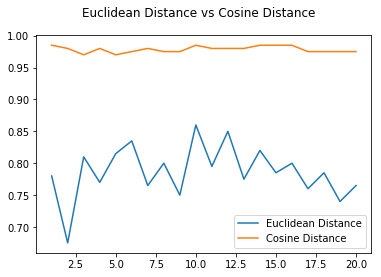

In [20]:
fig = plt.figure()
fig.suptitle('Euclidean Distance vs Cosine Distance')
k = np.array(range(1,21))
plt.plot(k,euci,label='Euclidean Distance')
plt.plot(k,cosine,label='Cosine Distance')
plt.legend()

**d.Using Python, modify the training and test data sets so that term weights are converted to TFxIDF
weights (instead of raw term frequencies). Then, rerun your evaluation on the range of K values (as
above) and compare the results to the results without using TFxIDF weights.**

In [21]:
##docment frequencies for each term
data_tf = np.array([(data!=0).sum(axis=1)]).T

In [22]:
data_tf.shape,data_matrix.shape,np.shape(data)

((5500L, 1L), (800L, 5500L), (5500, 800))

In [23]:
ndoc1=len(data_matrix)
ndoc2=len(test_matrix)

In [24]:
##calculate inverse document frequency
Ndata = np.ones(np.shape(data), dtype=float)*ndoc1
Ntest = np.ones(np.shape(predict), dtype=float)*ndoc2
#idf=log_2(n/df)
np.set_printoptions(precision=2, suppress=True,linewidth=120)
data_idf = np.log2(np.divide(Ndata, data_tf))
test_idf = np.log2(np.divide(Ntest, data_tf))

In [25]:
##weights = tf * idf
data_new = (data * data_idf).T.as_matrix()
test_new = (predict * test_idf).T.as_matrix()

In [26]:
## Euclidean distance
new_euci = [accuracy(test_new, data_new, data_label,test_label,i,0) for i in range(1,21)]
print new_euci

[0.63, 0.55, 0.63, 0.57, 0.68, 0.68, 0.58, 0.615, 0.55, 0.61, 0.555, 0.575, 0.545, 0.55, 0.53, 0.575, 0.535, 0.58, 0.54, 0.555]


In [27]:
## Cosine similarity meansure
new_cosine =  [accuracy(test_new, data_new, data_label,test_label, i, 1) for i in range(1,21)]
print new_cosine

[0.935, 0.945, 0.97, 0.955, 0.965, 0.965, 0.98, 0.975, 0.975, 0.975, 0.985, 0.98, 0.985, 0.98, 0.99, 0.985, 0.985, 0.985, 0.99, 0.985]


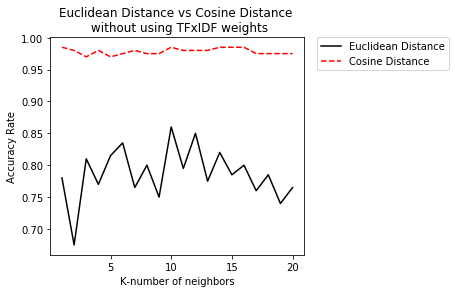

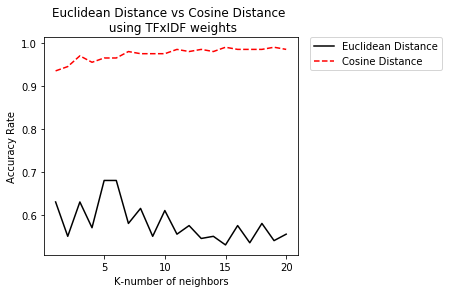

In [28]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Euclidean Distance vs Cosine Distance \n without using TFxIDF weights")
ax1.set_xlabel("K-number of neighbors")
ax1.set_ylabel("Accuracy Rate")
plt.plot(k, euci, 'k', label='Euclidean Distance')
plt.plot(k, cosine, 'r--', label='Cosine Distance')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig = plt.figure(figsize=(10,4))
ax2 = fig.add_subplot(121)
ax2.set_title("Euclidean Distance vs Cosine Distance \n using TFxIDF weights")
ax2.set_xlabel('K-number of neighbors')
ax2.set_ylabel('Accuracy Rate')
plt.plot(k, new_euci, 'k', label='Euclidean Distance')
plt.plot(k, new_cosine, 'r--', label='Cosine Distance')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**e.Create a new classifier based on the Rocchio Method adapted for text categorization. You should
separate the training function from the classifiation function. The training part for the classifier can be
implemented as a function that takes as input the training data matrix and the training labels, returning
the prototype vectors for each class. The classification part can be implemented as another function that
would take as input the prototypes returned from the training function and the instance to be classified.
This function should measure Cosine similarity of the test instance to each prototype vector. Your output
should indicate the predicted class for the test instance and the similarity values of the instance to each
of the category prototypes. Finally, compute the classification accuracy using the test instances and
compare your results to the best KNN approach you tried earlier.**

In [29]:
##define a new classifier based on the Rocchio Method adapted for text categorization

##the training part for the classifier
def Rocchio_Class(data, label):
    a = np.column_stack((data, label))
    # prototype vectors for each class
    class1 = np.array(np.zeros(data.shape[1]+1))
    class0 = np.array(np.zeros(data.shape[1]+1))
    N1 = 0
    N0 = 0
    for i in a:
        if i[-1] == 1:
            class1 += i
            N1 += 1
        else:
            class0 += i
            N0 += 1
    return class1,class0,N1,N0

In [30]:
##the classification part
def Rocchio_Classifier(class1,class0, X):
    ##measure Cosine similarity of the test instance to each prototype vector
    class1_norm = np.linalg.norm(class1)
    class0_norm = np.linalg.norm(class0)
    X_norm = np.linalg.norm(X)
    cosine1 = np.dot(class1[:len(class1)-1], X)/(class1_norm*X_norm)
    cosine0 = np.dot(class0[:len(class0)-1], X)/(class0_norm*X_norm)
    if cosine1 >= cosine0:
        return 1, cosine1, cosine0
    else:
        return 0, cosine1, cosine0  ##returning the prototype vectors for each class

In [31]:
##compute the classification accuracy 
def Rocchio_Accuracy(data, data_label, predict, test_label,class1,class0):
    correct = 0
    for i in range(len(predict)):
        p_class = Rocchio_Classifier(class1,class0, predict[i])
        if p_class[0] == test_label.loc[i][1]:
            correct += 1
    accuracy_rate = float(correct)/float(predict.shape[0])
    return accuracy_rate

In [32]:
data_label.loc[2][1]

0

In [33]:
data_matrix[0]

array([2., 2., 2., ..., 0., 0., 0.])

In [34]:
class1,class0,N1,N0= Rocchio_Class(data_matrix, data_label)
p_class = Rocchio_Classifier(class1,class0,test_matrix[0])

In [35]:
p_class

(1, 0.4316653925022475, 0.1583833604068815)

In [36]:
R_accuracy = Rocchio_Accuracy(data_matrix, data_label, test_matrix, test_label,class1,class0) 
R_accuracy

0.96

Comparing the accuracy of the Rocchio method and the K-Nearest Neighbor algorithm with/without the TFxIDF weight, the KNN algorithm with cosine distance has better accuracy rate which is 0.99. 

**2.Classification using scikit-learn**

**a.Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikitlearn.
Specifically, you need to separate the target attribute ("pep") from the portion of the data to be
used for training and testing. You will need to convert the selected dataset into the Standard
Spreadsheet format (scikit-learn functions generally assume that all attributes are in numeric form).
Finally, you need to split the transformed data into training and test sets (using 80%-
20% randomized split). [Review Ipython Notebook examples from Week 4 for different ways to perform
these tasks.]**

In [37]:
data1= pd.read_csv("bank_data.csv",sep=',',index_col=0)
data1.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [38]:
#drop index row
#data1.reset_index(drop=True, inplace=True)
#data1.head()

In [39]:
label = data1['pep']
label.head()

id
ID12101    YES
ID12102     NO
ID12103     NO
ID12104     NO
ID12105     NO
Name: pep, dtype: object

In [40]:
data1 = data1.drop('pep',axis=1)
data1.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage
id,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO


In [41]:
#create dummy variables
data1 = pd.get_dummies(data1)
data1.head()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12101,48,17546.0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
ID12102,40,30085.1,3,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1
ID12103,51,16575.4,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
ID12104,23,20375.4,3,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
ID12105,57,50576.3,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0


In [42]:
##split the transfored data into trainning and test sets

In [43]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction import DictVectorizer

C:\Users\Yanhong Simokat\Anaconda2\envs\py27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [44]:
data1_train,data1_test,data1_target_train,data1_target_test = train_test_split(data1,label,test_size=0.2,random_state=33)

In [45]:
data1_train.shape, data1_test.shape

((480, 19), (120, 19))

In [46]:
data1_test[0:5]

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12557,32,13267.6,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1
ID12467,59,29866.9,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0
ID12232,61,41609.5,3,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1
ID12549,53,48971.6,3,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,0
ID12438,65,38080.9,1,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,1


**b.Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you should first normalize
the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1).
Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Also,
compute the average accuracy score. Experiment with different values of K and the weight parameter
(i.e., with or without distance weighting) for KNN to see if you can improve accuracy (you do not need to
provide the details of all of your experimentation, but provide a short discussion on what parameters
worked best as well as your final results).**

In [47]:
min_max_scaler = preprocessing.MinMaxScaler().fit(data1_train)
data1_train_norm = min_max_scaler.transform(data1_train)
data1_test_norm = min_max_scaler.transform(data1_test)

In [48]:
np.set_printoptions(precision=2, linewidth=80, suppress=True)

In [49]:
data1_train_norm[0:5]

array([[0.57, 0.46, 0.67, 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  ],
       [0.8 , 0.78, 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  ],
       [0.14, 0.16, 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  ],
       [0.35, 0.18, 0.33, 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  ],
       [0.33, 0.18, 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  ]])

In [50]:
##First, use KNN classifer. You can vary K and monitor the accuracy metrics (see below) to find the best value.
n_neighbors = 18
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
knnclf.fit(data1_train_norm, data1_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')

In [51]:
##Next, we call the predict function on the test intances to produce the predicted classes
knnpreds_test = knnclf.predict(data1_test_norm)
print knnpreds_test

['NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO'
 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'YES' 'NO' 'NO' 'NO']


In [52]:
##evaluate classifier accuracy, the classification report
print classification_report(data1_target_test, knnpreds_test)

             precision    recall  f1-score   support

         NO       0.68      0.85      0.76        66
        YES       0.74      0.52      0.61        54

avg / total       0.71      0.70      0.69       120



In [53]:
##evaluate classifier accuracy, the confusion matrix
knncm = confusion_matrix(data1_target_test, knnpreds_test)
knn_train_score = knnclf.score(data1_train_norm, data1_target_train)
knn_test_score = knnclf.score(data1_test_norm, data1_target_test)

In [54]:
print knncm

[[56 10]
 [26 28]]


In [55]:
print knn_train_score,knn_test_score

0.7083333333333334 0.7


In [56]:
print "Average accuracy is",  (knn_train_score+knn_test_score)/2

Average accuracy is 0.7041666666666666


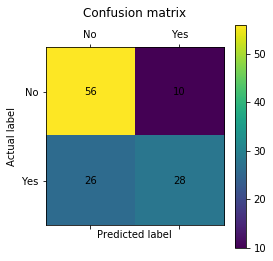

In [57]:
plt.matshow(knncm)
plt.title('Confusion matrix\n')
plt.colorbar()
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
for y in range(knncm.shape[0]):
    for x in range(knncm.shape[1]):
        plt.text(x, y, '{}'.format(knncm[y, x]),
                horizontalalignment = 'center',
                verticalalignment = 'center',)
plt.show()

After experimenting with several different values of k and varied weight parameters I think it is optimum for accuracy is to use k=18 with the weight parameter 'uniform', and this resulted in a  training accuracy of 0.708 and a testing accuracy of 0.7.

**c.Repeat the classification using scikit-learn's decision tree classifier (using the default parameters) and
the Naive Bayes (Gaussian) classifier. As above, generate the confusion matrix, classification report, and
average accuracy scores for each classifier. For each model, compare the average accuracry scores on
the test and the training data sets. What does the comparison tell you in terms of bias-variance tradeoff?**


In [58]:
## decision tree classifier
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
treeclf = treeclf.fit(data1_train, data1_target_train)
treepreds_test = treeclf.predict(data1_test)
treepreds_test

array(['NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO',
       'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO',
       'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES',
       'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO',
       'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO'],
      dtype=object)

In [59]:
tree_train_score = treeclf.score(data1_train, data1_target_train)
tree_test_score = treeclf.score(data1_test, data1_target_test)
print tree_train_score,tree_test_score

0.9875 0.8


In [60]:
print classification_report(data1_target_test, treepreds_test) 

             precision    recall  f1-score   support

         NO       0.79      0.86      0.83        66
        YES       0.81      0.72      0.76        54

avg / total       0.80      0.80      0.80       120



In [61]:
treecm = confusion_matrix(data1_target_test, treepreds_test)
print treecm

[[57  9]
 [15 39]]


In [62]:
print "Average accuracy is", (tree_train_score+tree_test_score)/2

Average accuracy is 0.89375


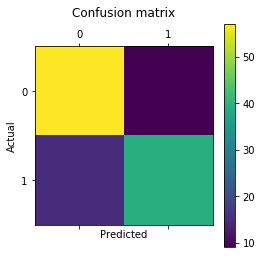

In [63]:
import pylab as plt
%matplotlib inline
plt.matshow(treecm)
plt.title('Confusion matrix\n')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [64]:
## the (Gaussian) naive Bayes classifier
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(data1_train, data1_target_train)
nbpreds_test = nbclf.predict(data1_test)
nbpreds_test

array(['NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES',
       'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO',
       'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES',
       'YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO',
       'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO',
       'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO',
       'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO'],
      dtype='|S3')

In [65]:
nb_train_score = nbclf.score(data1_train, data1_target_train)
nb_test_score = nbclf.score(data1_test, data1_target_test)

In [66]:
print nb_train_score, nb_test_score

0.65625 0.5916666666666667


In [67]:
nbcm = confusion_matrix(data1_target_test, nbpreds_test)
print nbcm

[[49 17]
 [32 22]]


In [68]:
print classification_report(data1_target_test, nbpreds_test)

             precision    recall  f1-score   support

         NO       0.60      0.74      0.67        66
        YES       0.56      0.41      0.47        54

avg / total       0.59      0.59      0.58       120



In [69]:
print "Average accuracy is",  (nb_train_score+nb_test_score)/2

Average accuracy is 0.6239583333333334


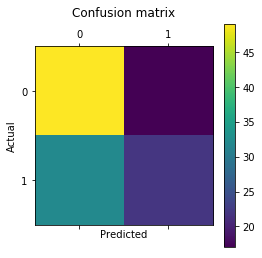

In [70]:
plt.matshow(nbcm)
plt.title('Confusion matrix\n')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**d.Discuss your observations based on the above experiments**

The decision tree classifier has the highest accuracy among the three classifiers. But the difference between the decision tree score on training and testing data set is greater than 0.1, it indicates an overfitted model. 

Between the KNN and Naive Bayes classifiers, KNN classifier has a higher accuracy rate of 0.7. Also the difference of KNN classifier scores between training and testing data set is very small by compare to Naive Bayes classifiers. Therefore,  K-nearest neighbor classifier is the best algorithm in this dataset.

**3.Data Analysis and Predictive Modeling on Census data**

**a.Preprocessing and data analysis:**

**•Examine the data for missing values. In case of categorical attributes, remove instances with missing values. In the case of numeric attributes, impute and fill-in the missing values using the attribute mean.**

**•Examine the characteristics of the attributes, including relevant statistics for each attribute, histograms illustrating the distribtions of numeric attributes, bar graphs showing value counts for categorical attributes, etc.**

**•Perform the following cross-tabulations (including generating bar charts): education+race, workclass+income, work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. Discuss your observations from this analysis.**

**•Compare and contrast the characteristics of the low-income and high-income categories across the
dif **

In [71]:
data2 = pd.read_csv("adult-modified.csv", sep=',', na_values='?')
data2.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K


In [72]:
data2.shape

(10000, 8)

In [73]:
data2.isnull().sum()

age               198
workclass         588
education           0
marital-status      0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

In [74]:
age_mean = data2['age'].mean()
print age_mean

38.449806162


In [75]:
##fill-in the missing values using the attribute mean
data2['age'].fillna(age_mean,axis=0,inplace=True)

In [76]:
data2['age'].isnull().sum()

0

In [77]:
## for categorical attributes, remove instances with missing values
data2.dropna(axis=0,inplace=True)

In [78]:
data2.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64

In [79]:
data2.shape

(9412, 8)

In [80]:
##basic statistics for each attribute
data2.describe(include='all')

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,9412.000000,9412,9412.000000,9412,9412,9412,9412.000000,9412
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Married,White,Male,NaN,<=50K
freq,NaN,6947,NaN,4737,8062,6383,NaN,7093
mean,38.366342,NaN,10.125266,NaN,NaN,NaN,41.080217,NaN
std,12.962039,NaN,2.542118,NaN,NaN,NaN,11.884590,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,28.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,47.000000,NaN,13.000000,NaN,NaN,NaN,45.000000,NaN


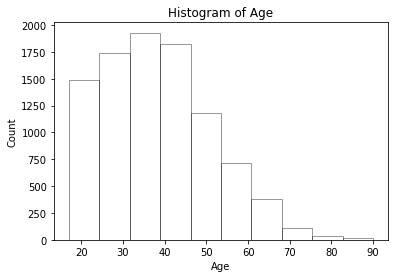

In [81]:
## Histogram for Age
plt.hist(data2['age'],bins=10,alpha=0.4,fill=None)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.grid(False)
plt.show()

The distribution of age is not normal distributed. It is right skewed. For the age attribute, the mean is 38 years old and the median is 37 years old.

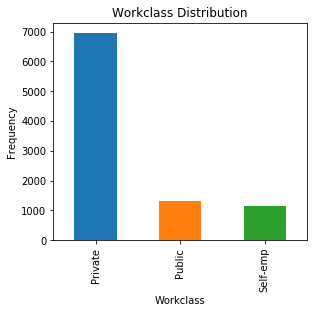

In [82]:
## bar plot for workclass attribute
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Workclass Distribution")
ax1.set_xlabel('Workclass')
ax1.set_ylabel('Frequency')
data2['workclass'].value_counts().plot(kind='bar')

for the workclass attribute, private work class has highest frequency 6974 

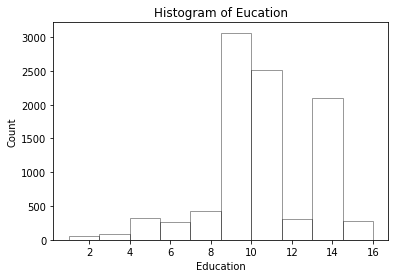

In [83]:
## Histogram for education
plt.hist(data2['education'],bins=10,alpha=0.4,fill=None)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Histogram of Eucation')
plt.grid(False)
plt.show()

for the education attribute, most of instances are between 8 and 12 years. The distribution is skewed to the left. The mean value and the median value are same 10 years.

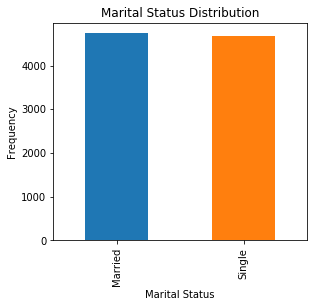

In [84]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Marital Status Distribution")
ax1.set_xlabel('Marital Status')
ax1.set_ylabel('Frequency')
data2['marital-status'].value_counts().plot(kind='bar')

For the marital status, the distribution between married and single is almost even with the number of married status being slightly greater than the single status. The married status has 4737 instances.

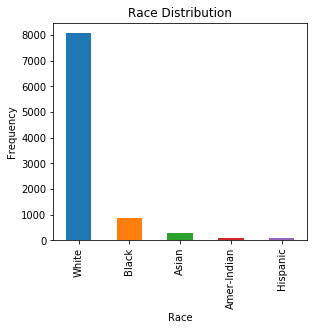

In [85]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Race Distribution")
ax1.set_xlabel('Race')
ax1.set_ylabel('Frequency')
data2['race'].value_counts().plot(kind='bar')

for the attribute Race, the most frequent instance is white, which has 8062 instances

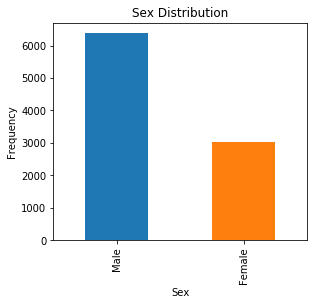

In [86]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Sex Distribution")
ax1.set_xlabel('Sex')
ax1.set_ylabel('Frequency')
data2['sex'].value_counts().plot(kind='bar')

For the attribute sex, male has highest frequency, which has 6383 instances

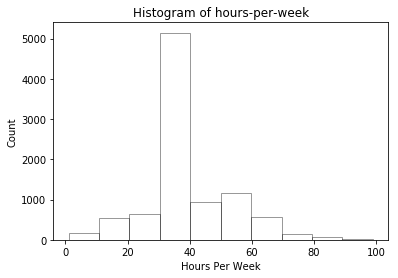

In [87]:
## Histogram for hours-per-week
plt.hist(data2['hours-per-week'],bins=10,alpha=0.4,fill=None)
plt.xlabel('Hours Per Week')
plt.ylabel('Count')
plt.title('Histogram of hours-per-week')
plt.grid(False)
plt.show()

As shown above, most of instances have a working hour per week between 30 and 40 hours. The mean is 41 hours and the median is 40 hours.

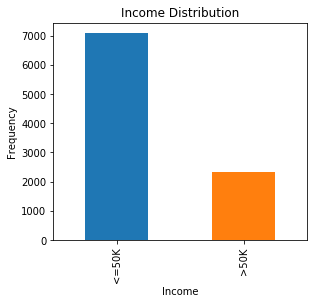

In [88]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Income Distribution")
ax1.set_xlabel('Income')
ax1.set_ylabel('Frequency')
data2['income'].value_counts().plot(kind='bar')

most income instances are less or equal to 50K, which has a total of 7093 instances.

In [89]:
## the cross tabulation and their corresponding bar charts.
er = pd.crosstab(data2.education, data2.race)
er

race,Amer-Indian,Asian,Black,Hispanic,White
education,,,,,
1,0,0,1,0,11
2,0,1,4,3,38
3,0,4,5,1,71
4,5,5,14,6,150
5,0,3,19,2,118
6,8,3,30,4,223
7,4,6,49,4,261
8,0,2,17,3,78
9,35,67,350,23,2590


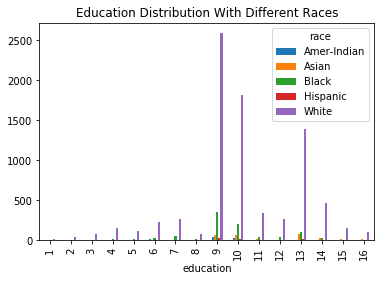

In [90]:
plt.show(er.plot(kind = "bar", title = "Education Distribution With Different Races"))

In general, most of instances of education fall into 9 years since this bin has the highest value in all the graphs. For Asian, 75 instances have 13 years of education which is the mode in the dataset. For Black, Hispanic, and White, they all have the most popular value on 9 years of education.

In [91]:
##workclass+income
wi = pd.crosstab(data2.workclass, data2.income)
wi

income,<=50K,>50K
workclass,,
Private,5443,1504
Public,925,392
Self-emp,725,423


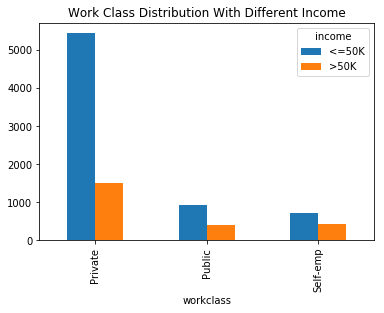

In [92]:
plt.show(wi.plot(kind = "bar", title = "Work Class Distribution With Different Income"))

In lower-income class, most of people are private working class. In the higher income class where income is greater than 50K, most of people are private wokring class as well.

In [93]:
##workclass+race
wr = pd.crosstab(data2.race, data2.workclass)
wr

workclass,Private,Public,Self-emp
race,,,
Amer-Indian,65,20,7
Asian,204,48,39
Black,664,192,36
Hispanic,64,5,6
White,5950,1052,1060


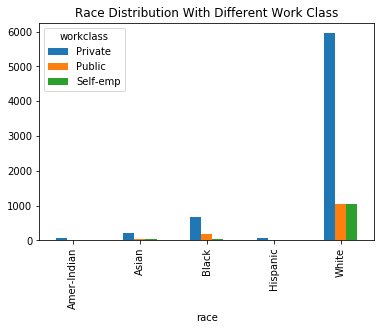

In [94]:
plt.show(wr.plot(kind = "bar", title = "Race Distribution With Different Work Class"))

Since the majority of instances in the dataset is White, so White is the dominate race for all. most of White race have private work class, for private and public working classes, Black is the second popular race, and Asian is the third popular race. But for self-employed working class, Asian is the second popular race  and Black is the third popular race.

In [95]:
##race+income
ri = pd.crosstab(data2.race, data2.income)
ri

income,<=50K,>50K
race,,
Amer-Indian,83,9
Asian,224,67
Black,773,119
Hispanic,69,6
White,5944,2118


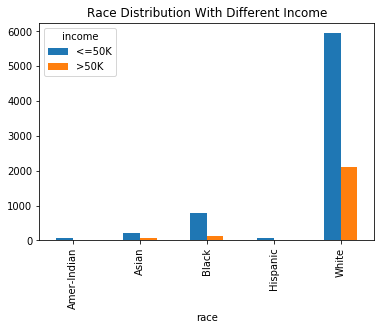

In [96]:
plt.show(ri.plot(kind = "bar", title = "Race Distribution With Different Income"))

In [97]:
pd.crosstab(data2.race, data2.income).apply(lambda r: r/r.sum(), axis=1)

income,<=50K,>50K
race,,
Amer-Indian,0.902174,0.097826
Asian,0.769759,0.230241
Black,0.866592,0.133408
Hispanic,0.920000,0.080000
White,0.737286,0.262714


The percentages of each race in either lower or upper income class, all the races have more percentages in the lower income class than the higher income class. Hispanic and Amer-Indian have over 90% of instances in the lower income class. White have the most instances 26% in the upper income class, Asian have slightly less instances in the upper income class which is 23%, then followed by Black which has 13% of instances in the upper income class.

In [98]:
##compare and comtrast the characteristics of the low-income and high-income categories across the different attributes
l_income = data2[data2.income=="<=50K"]
h_income = data2[data2.income==">50K"]

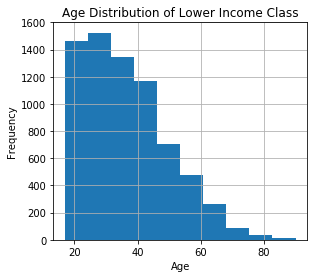

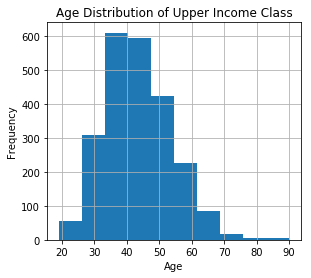

In [99]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Age Distribution of Lower Income Class")
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
l_income.age.plot(kind='hist', grid=True)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Age Distribution of Upper Income Class")
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
h_income.age.plot(kind='hist', grid=True)

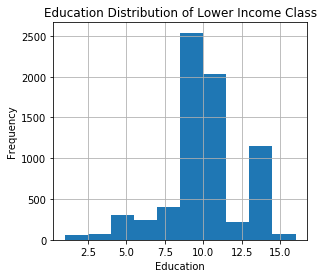

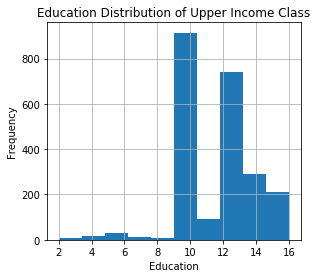

In [100]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Education Distribution of Lower Income Class")
ax1.set_xlabel('Education')
ax1.set_ylabel('Frequency')
l_income.education.plot(kind='hist', grid=True)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Education Distribution of Upper Income Class")
ax1.set_xlabel('Education')
ax1.set_ylabel('Frequency')
h_income.education.plot(kind='hist', grid=True)

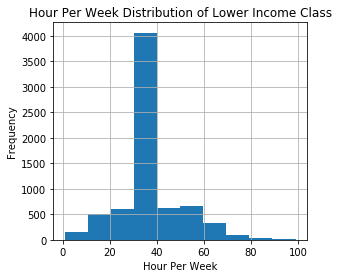

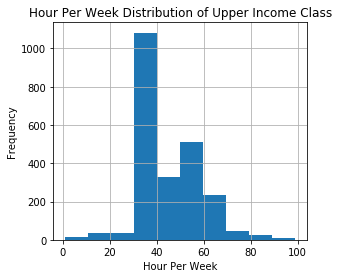

In [101]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Hour Per Week Distribution of Lower Income Class")
ax1.set_xlabel('Hour Per Week')
ax1.set_ylabel('Frequency')
l_income['hours-per-week'].plot(kind='hist', grid=True)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Hour Per Week Distribution of Upper Income Class")
ax1.set_xlabel('Hour Per Week')
ax1.set_ylabel('Frequency')
h_income['hours-per-week'].plot(kind='hist', grid=True)

In [102]:
data2.pivot_table(index=['income'], columns = 'race')

age                                              education  \
race   Amer-Indian      Asian      Black   Hispanic     White Amer-Indian   
income                                                                      
<=50K    36.835535  36.233255  37.057306  32.832606  36.64802    9.000000   
>50K     38.000000  42.947012  44.263440  44.166667  43.64119   10.222222   

                                                   hours-per-week             \
race        Asian      Black   Hispanic      White    Amer-Indian      Asian   
income                                                                         
<=50K   10.656250   9.360931   8.536232   9.668069      40.963855  40.160714   
>50K    11.895522  11.025210  12.500000  11.613314      45.777778  44.313433   

                                         
race        Black   Hispanic      White  
income                                   
<=50K   37.389392  41.956522  39.780619  
>50K    45.386555  50.833333  45.755902

In [103]:
data2.pivot_table(index=['income'], columns = 'workclass')

age                        education                        \
workclass    Private     Public   Self-emp    Private     Public   Self-emp   
income                                                                        
<=50K      35.204066  39.401563  43.942064   9.472717  10.579459   9.765517   
>50K       42.567782  44.593107  46.528127  11.402926  12.323980  11.565012   

          hours-per-week                        
workclass        Private     Public   Self-emp  
income                                          
<=50K          39.004409  39.148108  44.325517  
>50K           45.396277  43.520408  48.846336

In [104]:
data2.pivot_table(index=['income'], columns = 'marital-status')

age             education            hours-per-week  \
marital-status    Married     Single    Married     Single        Married   
income                                                                      
<=50K           42.842120  32.766717   9.357875   9.827871      41.513553   
>50K            43.864595  42.139739  11.470852  12.342949      45.616343   

                           
marital-status     Single  
income                     
<=50K           38.349072  
>50K            46.301282

In [105]:
data2.pivot_table(index=['income'], columns = 'sex')

age             education            hours-per-week           
sex        Female       Male     Female       Male         Female       Male
income                                                                      
<=50K   36.297580  36.853963   9.867366   9.514014      36.807793  41.231691
>50K    42.321665  43.873425  11.783333  11.552323      40.591667  46.648800

In general, people in the upper income class are older and have more education than those in the lower income class, also people in the upper income class are mostly married in comparison to that people in the lower income class are mostly single, moreover, people in the upper income class are work more than 40 hours a week.

**b.Predictive Modeling and Model Evaluation**

** •Using either Pandas or Scikit-learn, create dummy variables for the categorical attributes. Then
separate the target attribute ("income_>50K") from the attributes used for training. [Note: you need to
drop "income_<=50K" which is also created as a dummy variable in earlier steps).**

**•Use scikit-learn to build classifiers uisng Naive Bayes (Gaussian), decision tree (using "entropy" as
selection criteria), and linear discriminant analysis (LDA). For each of these perform 10-fold crossvalidation
(using cross-validation module in scikit-learn) and report the overall average accuracy.**

**•For the decision tree model (generated on the full training data), generate a visualization of tree and
submit it as a separate file (png, jpg, or pdf) or embed it in the Jupyter Notebook.
**


In [106]:
##create dummy variables for the categorical attributes
data2 = pd.get_dummies(data2)

In [107]:
data2 = data2.drop('income_<=50K', axis=1)
labels = np.array(data2['income_>50K'])
data2 = data2.drop('income_>50K', axis=1)
col_features = data2.columns

In [108]:
data2.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39.0,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50.0,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38.0,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53.0,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28.0,13,40,1,0,0,1,0,0,0,1,0,0,1,0


In [109]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [110]:
from sklearn import cross_validation
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(data2, labels)
nb_cv_scores = cross_validation.cross_val_score(nbclf, data2, labels, cv=10)
print("Overall Average Accuracy: %0.2f (+/- %0.2f)" % (nb_cv_scores.mean(), nb_cv_scores.std() * 2))

Overall Average Accuracy: 0.72 (+/- 0.02)


In [111]:
treelf = tree.DecisionTreeClassifier(criterion="entropy")
treeclf = treeclf.fit(data2, labels)
tree_cv_scores = cross_validation.cross_val_score(treeclf, data2, labels, cv=10)
print("Overall Average Accuracy: %0.2f (+/- %0.2f)" % (tree_cv_scores.mean(), tree_cv_scores.std() * 2))

Overall Average Accuracy: 0.77 (+/- 0.03)


In [112]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(data2, labels)
ld_cv_scores = cross_validation.cross_val_score(ldclf, data2, labels, cv=10)
print("Overall Average Accuracy: %0.2f (+/- %0.2f)" % (ld_cv_scores.mean(), ld_cv_scores.std() * 2))

Overall Average Accuracy: 0.81 (+/- 0.02)


Linear Discriminant Analysis has the highest accuracy.

For the decision tree model (generated on the full training data), generate a visualization of tree and submit it as a separate file (png, jpg, or pdf) or embed it in the Jupyter Notebook.

In [128]:
data2_col=['age', 'education', 'hours-per-week', 'workclass_Private',
       'workclass_Public', 'workclass_Self-emp', 'marital-status_Married',
       'marital-status_Single', 'race_Amer-Indian', 'race_Asian',
       'race_Black', 'race_Hispanic', 'race_White', 'sex_Female',
       'sex_Male']

In [130]:
from sklearn import tree
tree.export_graphviz(treeclf, out_file='tree.dot', feature_names=data2_col)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)